<a href="https://colab.research.google.com/github/hcpy/Local-GH-Data-for-Python-Project/blob/main/Copy_unit_6_notebook_6a_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 - Instructional DEMO 6a and 6b: Applications of Python in biomedical science: Statistics and Machine Learning

 - **Focus:** Basic statistical analyses and an introduction to machine learning (ML). 
 - **Author(s):** Sara B-C.
 - **Date Notebook Last Modified:** 08.22.2020
 - **Quick Description:** Here we run through the most common stats and ML tasks in biomedical data science. In the beginning, just hit play at each cell and watch things work. Once you are done, you can download the finished results. **There are some exercises to complete at the end!**

---
## Code outline
  0. Set up file stream (yep, this is in every notebook).
  1. Central tendency.
  2. Variability.
  3. Correlation.   
  4. Comparing means.
  5. Comparing freqs.
  6. Linear models (introduction to regressions).
  7. ML munging.
  8. Unsupervised learning - ML clustering.
  9. Supervised learning - ML regression.
  10. Supervised learning - ML classification.

---
## Additional notes
*   These tools will likely be instrumental to your final team projects.
*   The tools you are walked through here is not an exhaustive list, but if you work at NIH, these are by far the most common workflows you will encounter with regards to data analysis.  
*   Check out [GenoML](https://genoml.github.io/) for automated machine learning and genomics pipelines. 

## 0. Lets set up filestream access
Follow the directions on screen as you run the code cell below and then you can access the data stored on your 'My Drive'. For many of you, this is the first python code you will ever execute knowingly, as most google infrastructure is python based (another reason why the language is growing)You did this before, let's go!

In [4]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/FAES_BIOF309/")
 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Above you should now see the output "Mounted at /content/drive/". This means your storage is now connected to your notebook and its runtime. A runtime is the computer it will use to execute code and other computations. We'll cover what the above code means once you have learned some more python.

In [5]:
# Some quick imports.
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.stats.weightstats as sms
import statsmodels.formula.api as smf
import statsmodels.api as sm

## 1. Central tendency.


In [6]:
test_df = pd.read_csv("./example_data/discrete/training_addit.csv")

In [7]:
test_df['AGE'].mean()

64.156

In [8]:
test_df['AGE'].median()

65.0

In [9]:
test_df['AGE'].mode()

0    67
1    72
dtype: int64

In [10]:
test_df['AGE'].value_counts() 
# Note the tie at 67 and 72.

67    27
72    27
73    23
63    22
71    21
64    20
61    20
68    19
66    19
59    18
57    17
70    16
58    16
60    14
65    14
56    14
50    12
74    12
55    11
69    11
76    11
75    11
77    10
51    10
53    10
62    10
54     8
78     7
82     7
79     7
45     6
48     5
52     5
49     4
80     4
43     4
83     4
35     3
42     2
84     2
39     2
34     2
44     2
47     2
85     2
86     1
46     1
36     1
41     1
87     1
40     1
81     1
Name: AGE, dtype: int64

## 2. Variability.



In [11]:
test_df['AGE'].var(ddof=0) # Reports variance.

99.38766399999999

In [12]:
test_df['AGE'].std() 
# Reports the standard deviation of the mean.

9.979320501685006

In [13]:
test_df['AGE'].skew() 
# This reports a slightly negative skew to the distributed variance.

-0.41661743033100274

In [14]:
np.percentile(test_df['AGE'], [25, 50, 75]) 
# Percentiles via numpy.

array([58., 65., 72.])

In [15]:
test_df['AGE'].describe() 
# Saves us a lot of coding and time here!

count    500.000000
mean      64.156000
std        9.979321
min       34.000000
25%       58.000000
50%       65.000000
75%       72.000000
max       87.000000
Name: AGE, dtype: float64

## 3. Correlation.


In [16]:
r, p = scipy.stats.pearsonr(test_df['AGE'], test_df['UPSIT']) 
print(f"Your correlation coefficient is {r} with a pval of {p}") 
# Prints the correlation results, looks like an inverse association to me.

Your correlation coefficient is -0.25409712920895383 with a pval of 8.292255654314207e-09


## 4. Comparing  means.


In [17]:
training_df = pd.read_csv("./example_data/discrete/training_addit.csv")
validation_df = pd.read_csv("./example_data/discrete/validation_addit.csv")

t2, p2 = scipy.stats.ttest_ind(training_df['AGE'],validation_df['AGE']) # 2 sample independent t-test.
print(f"Your t-statistic is {t2} with a pval of {p2}") 
# Prints the results of the mean comparison, no signfiicant difference between training and validation data.

Your t-statistic is -0.3825747293448552 with a pval of 0.7021710457972911


## 5. Comparing freqs.


In [18]:
z, p = sms.ztest(training_df['FAMILY_HISTORY'],validation_df['FAMILY_HISTORY'])
print(f"Your z-statistic is {z} with a pval of {p}") # Prints the results of the frequency comparison, inclusing a Z and P values, no signfiicant difference between training and validation data.

Your z-statistic is -1.0660705242078015 with a pval of 0.2863917628555547


## 6. General linear models.

In [19]:
# Linear model, is AGE associated with UPSIT score?
this_formula = "UPSIT ~ AGE"
res = smf.ols(formula=this_formula, data=training_df).fit() 
print(res.summary()) # Age is negatively associated with UPSIT, very strongly!

                            OLS Regression Results                            
Dep. Variable:                  UPSIT   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     34.37
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           8.29e-09
Time:                        00:05:03   Log-Likelihood:                -1803.8
No. Observations:                 500   AIC:                             3612.
Df Residuals:                     498   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1540      2.604     15.804      0.0

In [20]:
# Logistic model, is UPSIT score associated with FAMILY_HISTORY of parkinson's disease after adjusting for AGE?
this_formula = "FAMILY_HISTORY ~ UPSIT + AGE"
res = smf.glm(formula=this_formula, family=sm.families.Binomial(), data=test_df).fit() 
print(res.summary()) # Both are important independently!

                 Generalized Linear Model Regression Results                  
Dep. Variable:         FAMILY_HISTORY   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -228.12
Date:                Thu, 28 Jul 2022   Deviance:                       456.25
Time:                        00:05:03   Pearson chi2:                     487.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0060      0.945      2.122      0.0

## 7. ML munging.
Primary aspects of data munging included in preprocessing are:
1. One hot encoding string and categorical data.
2. Imputing missing data.
2. Scaling data to approximately the same numeric space.
Remember, you need numeric data only for ML in `sklearn`. Luckily the package does have a lot of [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) tools.

In [21]:
# Impute missing values to mean of the series.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy ='mean') 
  
data = [[12, np.nan, 34], [10, 32, np.nan], [np.nan, 11, 20]] 
  
print("Original Data : \n", data) 
# Fitting the data to the imputer object 
imputer = imputer.fit(data) 

Original Data : 
 [[12, nan, 34], [10, 32, nan], [nan, 11, 20]]


In [22]:
# Imputing the data      
data = imputer.transform(data) 
  
print("Imputed Data : \n", data) # Remember we impute by columns.

Imputed Data : 
 [[12.  21.5 34. ]
 [10.  32.  27. ]
 [11.  11.  20. ]]


In [23]:
# Now let's scale some data (normalization). Some algorithms for ML require all data to be in the same numeric space.
from sklearn import preprocessing

# standardize the data attributes
training_df = pd.read_csv("./example_data/discrete/training_addit.csv")
training_df['standardized_AGE'] = preprocessing.scale(training_df['AGE']) # Pretty easy, huh 

In [24]:
training_df['AGE'].describe() # Raw data description.

count    500.000000
mean      64.156000
std        9.979321
min       34.000000
25%       58.000000
50%       65.000000
75%       72.000000
max       87.000000
Name: AGE, dtype: float64

In [25]:
training_df['standardized_AGE'].describe() # Centered at mean of 0 and standard deviation of 1 (except for floating point rounding issues).

count    5.000000e+02
mean    -5.773160e-16
std      1.001002e+00
min     -3.024875e+00
25%     -6.174935e-01
50%      8.465960e-02
75%      7.868127e-01
max      2.291426e+00
Name: standardized_AGE, dtype: float64

## 8. Unsupervised Learning - ML clustering.

In [26]:
# Make some theoretical data that clusters well using `make_blob`, but first load some packages. This was extracted from sklearn and cmdline tutorials.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Load make_blobs to simulate data.
from sklearn.datasets import make_blobs

# Load decomposition to do PCA analysis with sklearn.
from sklearn import decomposition

X1, Y1 = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, random_state=4,
         cluster_std=2)
print(X1.shape)

(100, 10)


In [27]:
pca = decomposition.PCA(n_components=4)

In [28]:
pc = pca.fit_transform(X1)

In [29]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


In [30]:
pca.explained_variance_ratio_

array([0.41594854, 0.3391866 , 0.1600729 , 0.02016822])

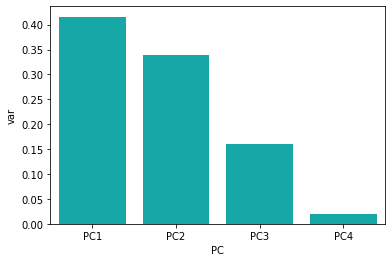

In [31]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

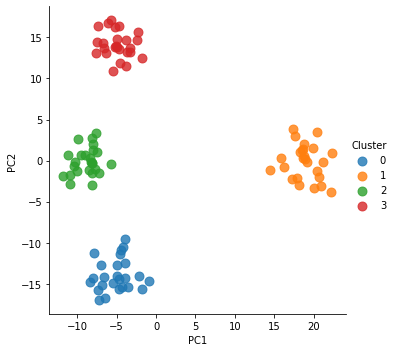

In [32]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # Color by cluster.
  legend=True,
  scatter_kws={"s": 80}) # Specify the point size.

## 9. Supervised Learning - ML regression.
Based on a great example from geeksforgeeks.

In [33]:
# Some imports.
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model 
import pandas as pd 

In [34]:
# Load the data, format it and do some exploring.
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Housing.csv")

Y = df['price'] 
X = df['lotsize'] 
   
X=X.values.reshape(len(X),1) 
Y=Y.values.reshape(len(Y),1) 
   
# Split the data into training/testing sets.
X_train = X[:-250] 
X_test = X[-250:] 
   
# Split the targets into training/testing sets. 
Y_train = Y[:-250] 
Y_test = Y[-250:] 

In [35]:
# Create linear regression object. You can pick other algorithms from the sklearn toolbox as well.
regr = linear_model.LinearRegression() 
   
# Train the model using the training sets. 
regr.fit(X_train, Y_train) 


LinearRegression()

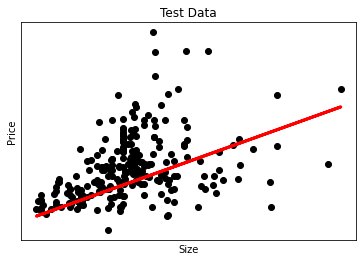

In [36]:
# Plot output in the test dataset after the trained model from the training dataset has been applied.
plt.scatter(X_test, Y_test,  color='black') 
plt.title('Test Data') 
plt.xlabel('Size') 
plt.ylabel('Price') 
plt.xticks(()) 
plt.yticks(()) 
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3) 
plt.show() 

In [37]:
# Now examine various metrics for the model in the test dataset.
from sklearn.metrics import explained_variance_score, mean_squared_error, median_absolute_error, r2_score

name = "regr"
algo = regr

test_predictions = algo.predict(X_test)
test_predictions = test_predictions
evs = explained_variance_score(Y_test, test_predictions)
print("Explained variance score: {:.4}".format(evs))
	
test_predictions = algo.predict(X_test)
test_predictions = test_predictions
mse = mean_squared_error(Y_test, test_predictions)
print("Mean squared error: {:.4}".format(mse))
	
test_predictions = algo.predict(X_test)
test_predictions = test_predictions
mae = median_absolute_error(Y_test, test_predictions)
print("Median absolute error: {:.4}".format(mae))
	
test_predictions = algo.predict(X_test)
test_predictions = test_predictions
r2s = r2_score(Y_test, test_predictions)
print("R^2 score: {:.4}".format(r2s))

Explained variance score: 0.1459
Mean squared error: 7.259e+08
Median absolute error: 1.472e+04
R^2 score: -0.07359


## 10. Supervised Learning - ML classification.
Also based on a similar model from geeksforgeeks.

In [38]:
# Some imports.
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [39]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header= None) 

# Separating the predicting column from the whole dataset. 
X = df.iloc[:, :-1].values 
y = df.iloc[:, 4].values 
  
# Encoding the predicting variable. 
labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y) 
  
# Splitting the data into test and train dataset. 
X_train, X_test, y_train, y_test = train_test_split( 
              X, y, test_size = 0.3, random_state = 0) 
  
# Using the random forest classifier for the prediction. There are many other algorithms as you will come to learn each performing slightly differently. 
classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train,y_train) 
predicted=classifier.predict(X_test) 
  
# Printing the results. 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, predicted)) 
print ('Accuracy Score :',accuracy_score(y_test, predicted)) 
print ('Report : ') 
print (classification_report(y_test, predicted)) 

Confusion Matrix :
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy Score : 0.9777777777777777
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Makes sense, now on to some exercises ...**

# Unit 6 - Assignment #6a
***Come here to prove your knowledge.***

Text cells will indicate a task.  
Write your commands in the empty code cells below them.

## 1. Load any dataset you want (./example_data is an easy choice) and print the mean and standard deviation of a continuous variable below.

## 2. Calculate the variance of a variable of interest and explore the correlation between any two variables in a dataframe of your choosing.

## 3. Compare the frequencies of any two binary variables.

## 4. Compare the means of any two continuous variables.

## 5. Impute some random data

## 6. Summarize a regression model using any data you'd like to try (either using `ols` or `glm`).

# Thanks, this is the end of the course!